# Testing for Trends - Lab

## Introduction

In this lab, you'll practice your knowledge on testing for stationarity.

## Objectives

You will be able to:

* Check and comment on the stationarity of time series data 
* Use rolling statistics as an initial check for stationarity 
* Use the Dickey Fuller Test for performing statistical testing for time series stationarity

## Importing the data

Let's look at some new data. In this lab, We'll work by creating a time-series object in Python by using the popular [Air Passengers dataset](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv).

This dataset is stored as `passengers.csv`.

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Import `passengers.csv` and view the head.

In [35]:
data_raw = pd.read_csv('passengers.csv')
data_raw.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Change the `Month` column over to a `datetime` object and make sure it is set as the index.

In [36]:
# Set month column as a timeseries object, and make it the index
data_raw.Month = pd.to_datetime(data_raw.Month)
data_raw.set_index('Month', inplace=True)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


In [40]:
# check the head and the new index
data_raw.head()
data_raw.index
# DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
#                '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
#                '1949-09-01', '1949-10-01',
#                ...
#                '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
#                '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
#                '1960-11-01', '1960-12-01'],
#               dtype='datetime64[ns]', name='Month', length=144, freq=None)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Now that we have successfully created a TS object, we can use simple `plot()` function in pandas to visually inspect this time-series.

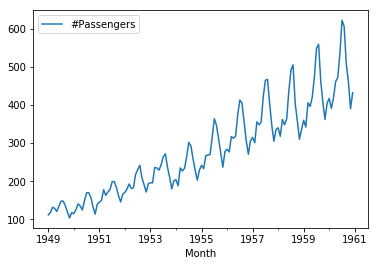

In [41]:
# Plot the time series data 
data_raw.plot()

It is clearly evident that there is an overall increasing trend in the data along with some seasonal variations. However, it might not always be possible to make such visual inferences. Let's reconfirm this here using both **rolling statistics** and 

## Rolling Statistics 

Use the `.rolling()` function to find rolling mean and rolling std with a window of 12 months. Plot the original curve along with the rolling mean and standard error.

In [51]:
#Determine rolling statistics

rolmean = data_raw.rolling(window = 12, center = False).mean()
rolstd = data_raw.rolling(window=12, center = False).std()

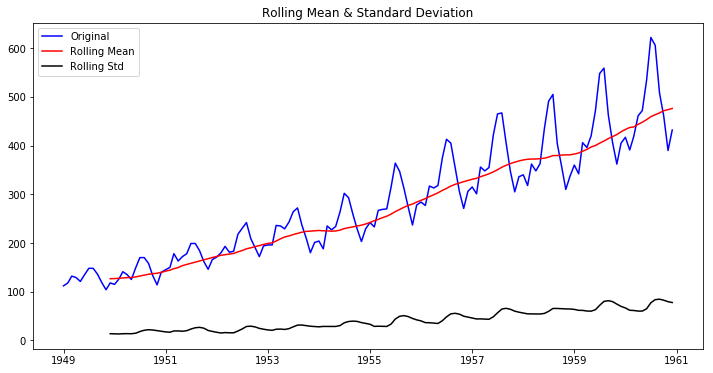

In [48]:
#Plot rolling statistics
fig = plt.figure(figsize=(12,7))
orig = plt.plot(data_raw, color = 'Blue', label='Original')
mean = plt.plot(rolmean,color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Standard Deviation')

Though the variation in standard deviation is small, mean is clearly increasing with time and thus, this is not a stationary series. 

## Dickey-Fuller Test 

Use the Dickey-Fuller Test to verify your visual result.

In [57]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
dftest = adfuller(data_raw['#Passengers'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print('Results of Dickey-Fuller Test:')
print(dfoutput)

# Results of Dickey-Fuller Test:
# Test Statistic                   0.815369
# p-value                          0.991880
# #Lags Used                      13.000000
# Number of Observations Used    130.000000
# Critical Value (1%)             -3.481682
# Critical Value (5%)             -2.884042
# Critical Value (10%)            -2.578770
# dtype: float64

(0.8153688792060597, 0.9918802434376411, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


## Conclusion here

## Level up - Optional

Repeat the previous steps for the NYSE monthly data , stored in "NYSE_monthly.csv".

(-0.15, 0.15)

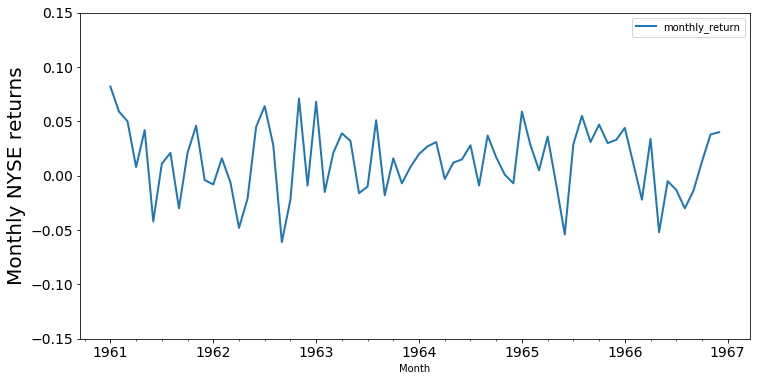

In [64]:
data_NYSE = pd.read_csv('NYSE_monthly.csv')
data_NYSE.Month = pd.to_datetime(data_NYSE.Month)
data_NYSE.set_index("Month", inplace=True)
data_NYSE.plot(figsize=(12,6),linewidth=2,fontsize=14)
plt.xlabel("Month")
plt.ylabel('Monthly NYSE returns', fontsize=20)
plt.ylim((-0.15,0.15))

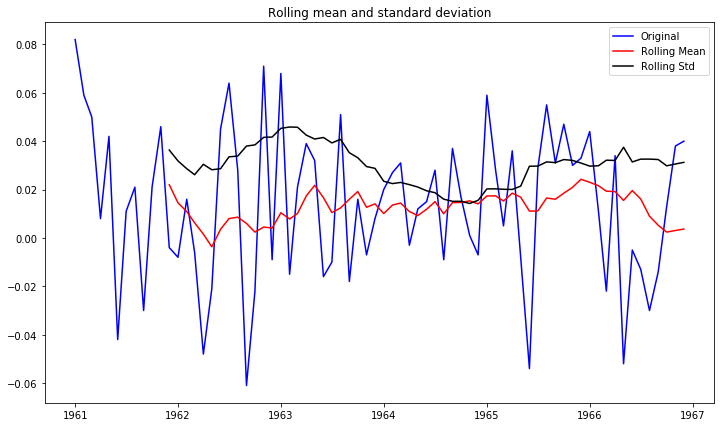

In [73]:
rolling_mean = data_NYSE.rolling(window = 12, center = False).mean()
rolling_std = data_NYSE.rolling(window = 12, center = False).std()

fig = plt.figure(figsize=(12,7))
data_NYSE
orig = plt.plot(data_NYSE, color='blue',label='Original')
mean = plt.plot(rolling_mean, color='red',label='Rolling Mean')
std = plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling mean and standard deviation')
plt.show(block=False)

In [77]:
dftest = adfuller(data_NYSE.monthly_return)

# Extract and display teset results in a user friendly way
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    print(dftest)

(-7.895374756572355, 4.3251262842626954e-12, 0, 71, {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}, -240.18590988937115)
(-7.895374756572355, 4.3251262842626954e-12, 0, 71, {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}, -240.18590988937115)
(-7.895374756572355, 4.3251262842626954e-12, 0, 71, {'1%': -3.526004646825607, '5%': -2.9032002348069774, '10%': -2.5889948363419957}, -240.18590988937115)


In [81]:
print(dfoutput,'\n\n','when small p, reject null hypothesis')

Test Statistic                -7.895375e+00
p-value                        4.325126e-12
#Lags Used                     0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64 

 when small p, reject null hypothesis


## Summary

In this lab, we learnt to check for the stationarity of a time-series object in Python. Next, we'll further explore stationarity and how to make sure to make time series stationary!